In [373]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

###LOADING DATA 
data_set = pd.read_csv('training_set.csv')

data_set = data_set.rename(columns = {
    "Gender": "gender",
    "Age": "age",
    "Sleep Duration": "time_slept",
    "Quality of Sleep": "sleep_score",
    "Stress Level": "stress_level",
    "BMI Category": "bmi_category",
    "Heart Rate": "heart_rate",
    "Daily Steps": "daily_steps"
})

columns_to_drop = ['Physical Activity Level', 'Occupation', 'Blood Pressure', 'Sleep Disorder', 'Person ID']
data_set = data_set.drop(columns=columns_to_drop)
data_set['gender'] = data_set['gender'].map({
    "Male": 1,
    "Female": 0
})

data_set['bmi_category'] = data_set['bmi_category'].replace({
    'Normal Weight': 'Normal'
})

data_set['bmi_category'] = data_set['bmi_category'].map({
    "Normal": 0,
    "Overweight": 1,
    "Obese": 2
})

In [5]:
data_set['sleep_deficit'] = data_set['time_slept'] - 8

In [ ]:
data_set['sleep_deficit_and_age'] = (data_set['sleep_deficit'] * data_set['age']) / 1000 #might use this later

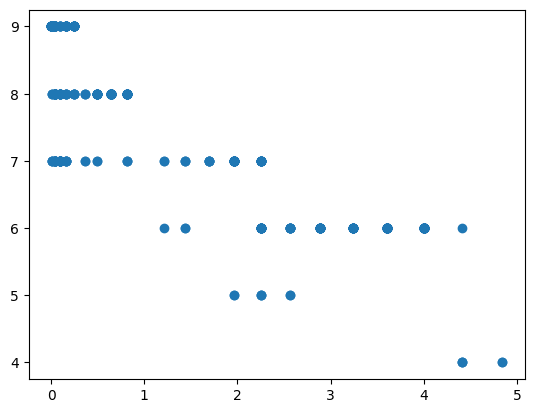

In [33]:
#Lets define recommended sleep
plot.scatter(data_set['sleep_deficit']**2, data_set['sleep_score']) #this one here is great
plot.show()

In [154]:
data_set['sleep_deficit'] = data_set['time_slept'] - 8.5

In [343]:
def regress_sleep_deficit():
    X = data_set['sleep_deficit'].to_numpy()
    X_squared = X**2
    y = data_set['sleep_score'].to_numpy()
    y_hat = 0

    learning_rate = 0.01

    weight_1 = 0
    bias = 0

    iterations = 50000


    m = len(y)

    for i in range(iterations):
        y_hat = weight_1 * X_squared + bias

        error = y_hat - y

        gradient_weight_1 = (1/m) * np.dot(error, X_squared)
        gradient_bias = (1/m) * np.sum(error)

        weight_1 -= learning_rate * gradient_weight_1
        bias -= learning_rate * gradient_bias
    
    bias += 0.1
    y_hat = weight_1 * (X_squared) + bias
    mse = np.mean((y_hat - y)**2)
    print("MSE:", mse)
    

    return weight_1, bias



In [368]:
weight_1, bias = regress_sleep_deficit()

MSE: 0.354820493268653


In [345]:
print(weight_1)
print(bias)

-0.4699773730911285
8.588984016359197


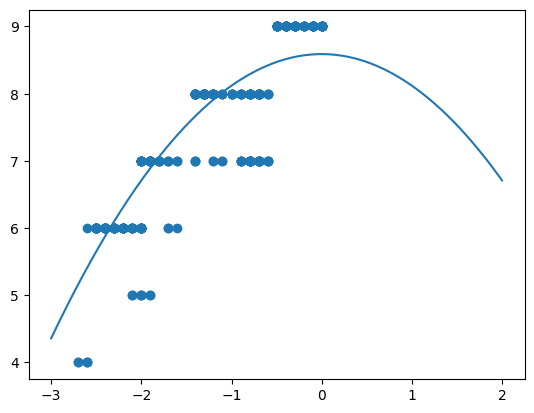

In [323]:
import numpy as np

x_range = np.linspace(-3, 2, 1000)
x_squared = x_range**2
x_penalty = np.where(x_range < -2, (x_range + 2)**2, 0)
y_pred = weight_1 * x_squared + bias
    
plot.scatter(data_set['sleep_deficit'], data_set['sleep_score'])
plot.plot(x_range, y_pred)
plot.show()



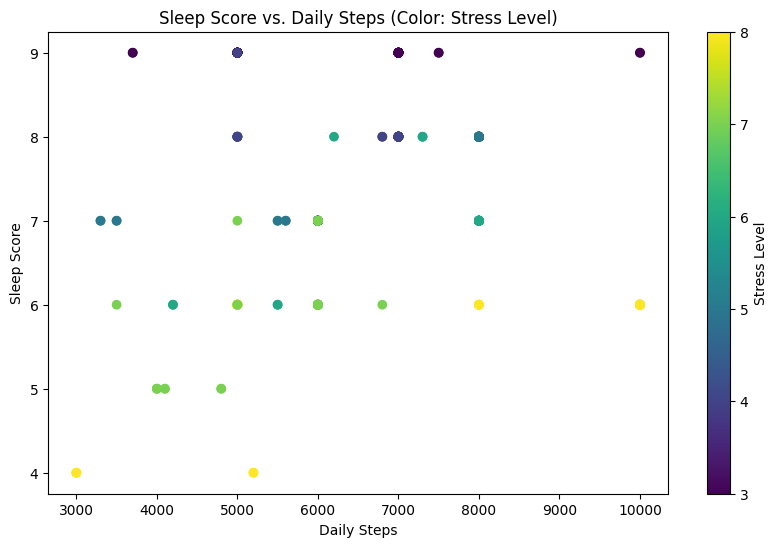

In [338]:
#data_set['step_deficit'] = data_set['daily_steps'] - 8500

def plot_step_info():
    import matplotlib.pyplot as plt

    x = data_set['daily_steps']
    y = data_set['sleep_score']
    c = data_set['stress_level']  # third dimension

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(x, y, c=c, cmap='viridis')
    plt.xlabel("Daily Steps")
    plt.ylabel("Sleep Score")
    plt.title("Sleep Score vs. Daily Steps (Color: Stress Level)")
    cbar = plt.colorbar(scatter)
    cbar.set_label("Stress Level")
    plt.show()

plot_step_info()

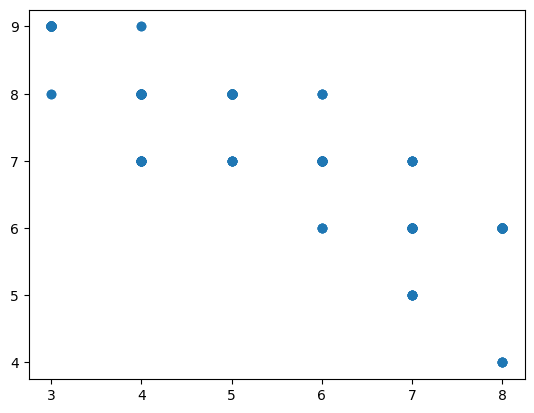

In [342]:
def plot_sleep_stress():
    plot.scatter(data_set['stress_level'], data_set['sleep_score'])
    plot.show()

plot_sleep_stress()

In [361]:
def regress_sleep_stress(epoch, learning_rate):
    X = data_set['stress_level']
    y = data_set['sleep_score']
    y_hat = 0
    weight_1 = 0
    bias = 0 
    m = len(y)

    for i in range(epoch):
        y_hat = weight_1 * X + bias
        error = y_hat - y

        gradient_weight_1 = (1/m) * np.dot(error, X)
        gradient_bias = (1/m) * np.sum(error)

        weight_1 -= learning_rate * gradient_weight_1
        bias -= learning_rate * gradient_bias
    
    ##Quickly calculate the MSE to get a gauge of how well the model did 
    y_hat = weight_1 * X + bias
    mse = np.mean((y_hat - y)**2)

    print(f'MSE: {mse}')

    return weight_1, bias
        

MSE: 0.27469333057142503
Weight_1: -0.6062274064157418
Bias: 10


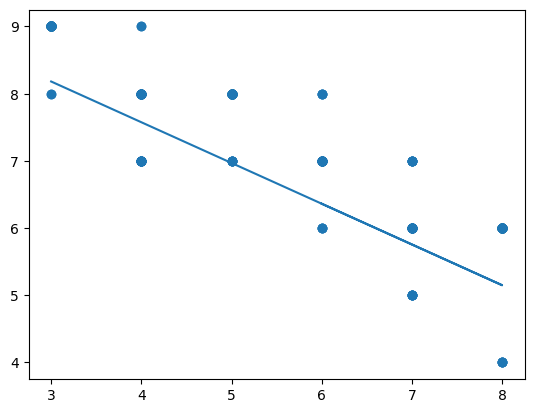

In [370]:
def sleep_stress_testing():
    weight_1, bias = regress_sleep_stress(50000, 0.01)

    plot.scatter(data_set['stress_level'], data_set['sleep_score'])
    bias = 10

    y_hat = weight_1 * data_set['stress_level'] + bias

    plot.plot(data_set['stress_level'], y_hat)

    print(f'Weight_1: {weight_1}')
    print(f'Bias: {bias}')


sleep_stress_testing()

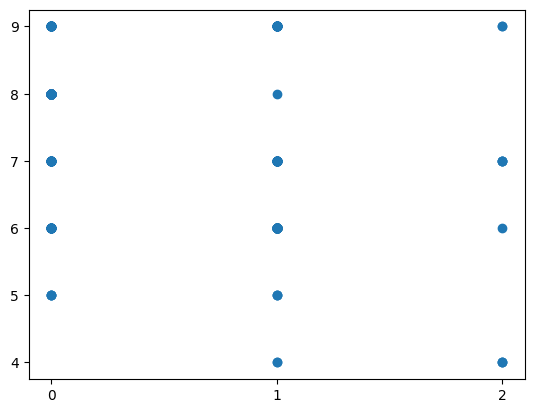

In [374]:
from matplotlib.ticker import MultipleLocator

def plot_sleep_bmi():
    fig, ax = plot.subplots()
    ax.scatter(data_set['bmi_category'], data_set['sleep_score'])
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    plot.show()


plot_sleep_bmi()

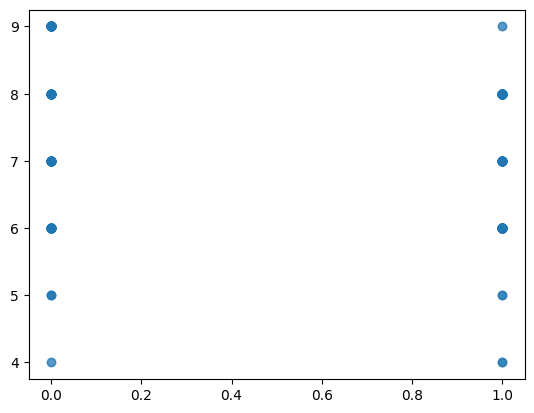

bmi_category
0    7.638889
1    6.898649
2    6.400000
Name: sleep_score, dtype: float64
gender
0    7.664865
1    6.968254
Name: sleep_score, dtype: float64


In [377]:
def plot_gender_sleep():
    plot.scatter(data_set['gender'], data_set['sleep_score'], alpha=0.5)
    plot.show()

plot_gender_sleep()

print(data_set.groupby('bmi_category')['sleep_score'].mean())
print(data_set.groupby('gender')['sleep_score'].mean())

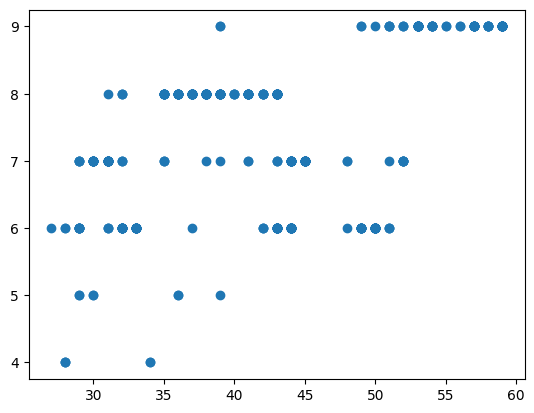

In [379]:
def plot_age_sleep():
    plot.scatter(data_set['age'], data_set['sleep_score'])
    plot.show()

plot_age_sleep()

In [380]:
print(data_set.groupby('age')['sleep_score'].mean())

age
27    6.000000
28    4.800000
29    6.153846
30    6.692308
31    6.888889
32    6.529412
33    6.000000
34    4.000000
35    7.750000
36    7.500000
37    7.900000
38    7.950000
39    7.866667
40    8.000000
41    7.833333
42    7.333333
43    7.088235
44    6.400000
45    7.000000
48    6.666667
49    6.545455
50    6.150000
51    7.625000
52    7.666667
53    9.000000
54    9.000000
55    9.000000
56    9.000000
57    9.000000
58    9.000000
59    9.000000
Name: sleep_score, dtype: float64


In [ ]:
def predict_sleep_score(row, w_deficit, b_deficit, w_stress, b_stress):

    stress_component = w_stress * row['stress_level'] + b_stress


    deficit = row['time_slept'] - 8.5
    deficit_component = w_deficit * (deficit ** 2) + b_deficit


    step_boost = 0.5 if row['daily_steps'] >= 4000 else 0


    age_boost = 0.6 if row['age'] >= 35 else 0


    bmi_penalty = 0
    if row['bmi_category'] == 1:
        bmi_penalty = -0.3
    elif row['bmi_category'] == 2:
        bmi_penalty = -0.6


    predicted_score = (((stress_component) + (deficit_component)) / 2) + step_boost + age_boost + bmi_penalty

    if row['gender'] == 1: 
        predicted_score -= 0.5

    return max(1, min(10, predicted_score))

def call_predictor():
    predictions = data_set.apply(lambda row: predict_sleep_score(row, -0.4699773730911285, 8.588984016359197, -0.6062274064157418, 10), axis=1)
    mse = np.mean((predictions - data_set['sleep_score']) ** 2)
    print(f'Final MSE: {mse:.3f}')

    return predictions.to_numpy()

call_predictor()


Final MSE: 0.313


array([5.62227495, 5.42649223, 5.42649223, 3.98105886, 3.98105886,
       3.98105886, 4.73535084, 7.16066533, 7.16066533, 7.16066533,
       5.31604755, 7.16066533, 5.31604755, 5.20090309, 5.20090309,
       5.20090309, 6.73274134, 5.20090309, 6.73274134, 7.08546895,
       7.12541703, 7.12541703, 7.12541703, 7.12541703, 7.16066533,
       7.19121386, 7.16066533, 7.19121386, 7.19121386, 7.19121386,
       6.63639598, 6.63639598, 8.49744127, 5.31604755, 7.12541703,
       5.31604755, 5.31604755, 7.08546895, 7.08546895, 7.08546895,
       7.12541703, 7.12541703, 7.12541703, 7.16066533, 7.12541703,
       7.16066533, 7.12541703, 7.16066533, 7.12541703, 7.12541703,
       7.95016221, 7.95016221, 5.20090309, 7.08546895, 5.20090309,
       5.20090309, 7.12541703, 5.20090309, 5.20090309, 7.12541703,
       5.20090309, 5.20090309, 5.42649223, 5.42649223, 5.42649223,
       5.42649223, 6.87867891, 5.20090309, 6.43271964, 6.43271964,
       5.31604755, 5.31604755, 5.31604755, 5.31604755, 5.20090

Final MSE: 0.313


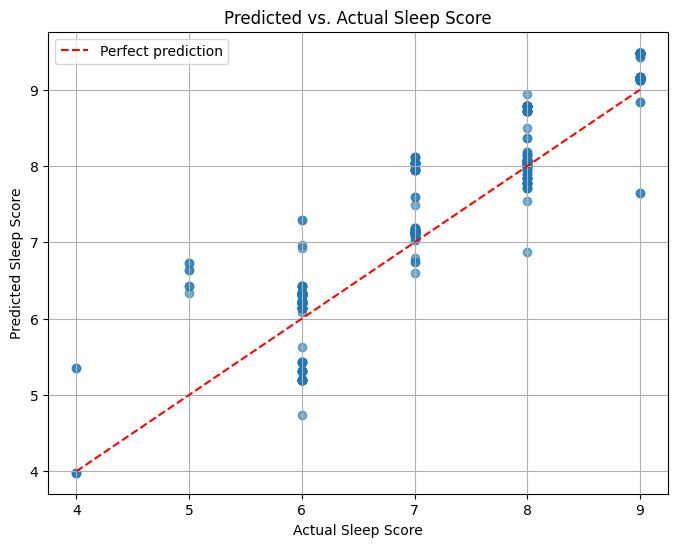

In [407]:
#Making sure
def plot_mse():
    y_true = data_set['sleep_score'].to_numpy()
    y_pred = call_predictor() 

    plot.figure(figsize=(8, 6))
    plot.scatter(y_true, y_pred, alpha=0.6)
    plot.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect prediction')

    plot.xlabel("Actual Sleep Score")
    plot.ylabel("Predicted Sleep Score")
    plot.title("Predicted vs. Actual Sleep Score")
    plot.legend()
    plot.grid(True)
    plot.show()

plot_mse()